In [1]:
from helpers import *
import matplotlib.pyplot as plt

data = get_data("data/cdr.csv")
analyzed_data = data[(data['DATE'] >= '2020-01-01') & (data['DATE'] < '2022-09-27')]

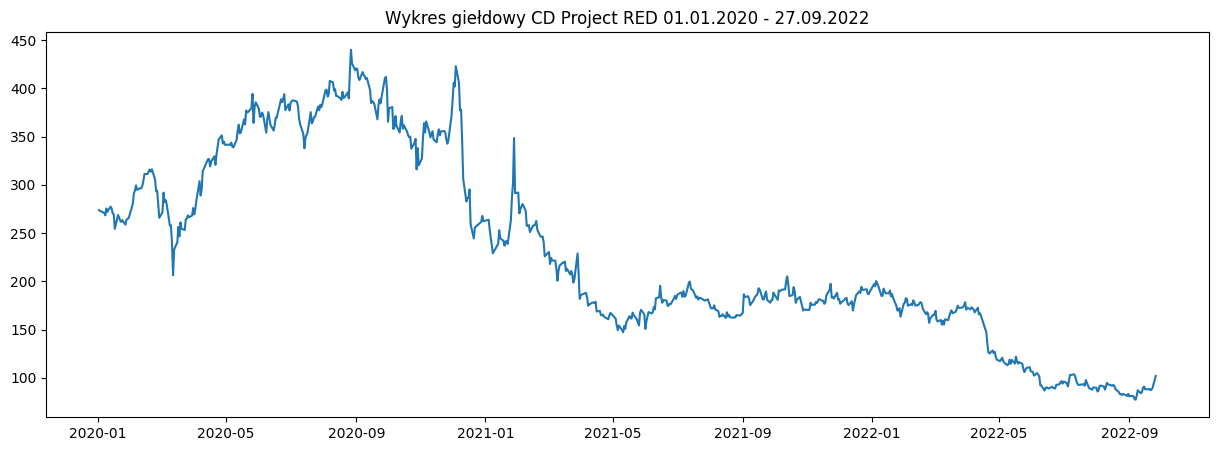

In [2]:
plt.figure(figsize=(15,5))
plt.plot(analyzed_data["DATE"].values, analyzed_data["VALUE"].values)
plt.title("Wykres giełdowy CD Project RED 01.01.2020 - 27.09.2022")
plt.show()

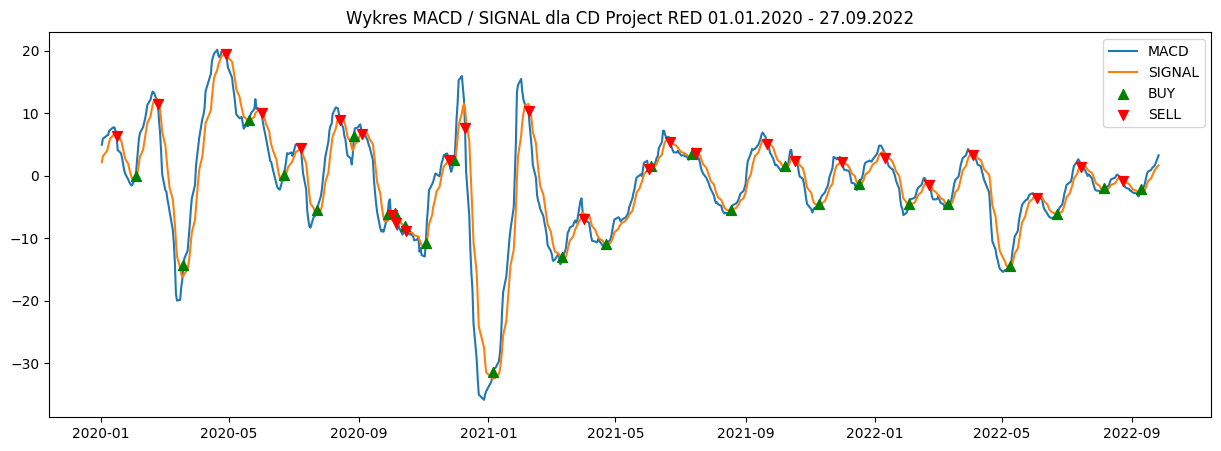

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(analyzed_data["DATE"].values, analyzed_data["MACD"].values)
plt.plot(analyzed_data["DATE"].values, analyzed_data["SIGNAL"].values)
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'BUY']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'BUY']["MACD"].values, color='green', marker='^', s=50, zorder=15, label='BUY')
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'SELL']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'SELL']["MACD"].values, color='red', marker='v', s=50, zorder=15, label='SELL')
plt.legend(['MACD', 'SIGNAL', 'BUY', 'SELL'])
plt.title("Wykres MACD / SIGNAL dla CD Project RED 01.01.2020 - 27.09.2022")
plt.show()

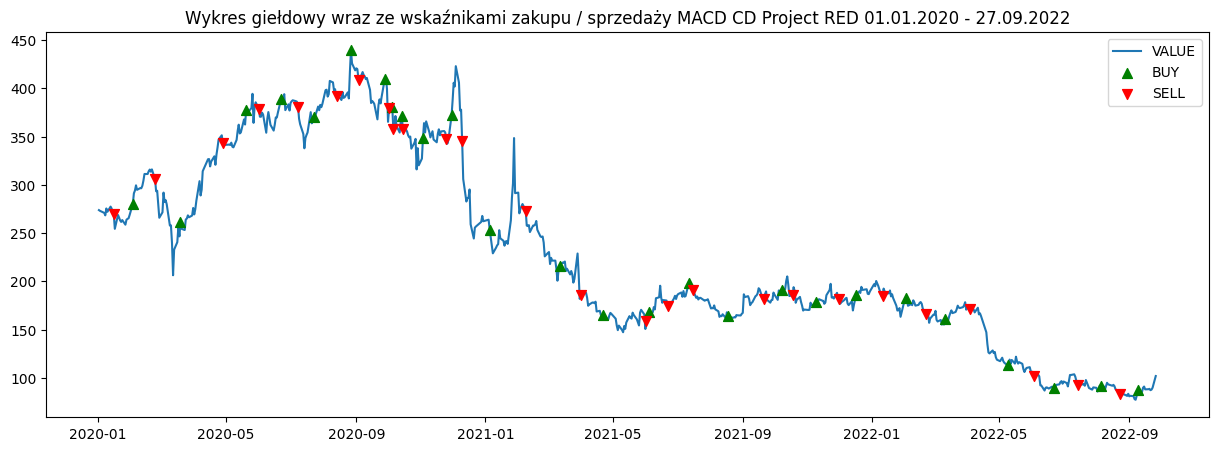

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(analyzed_data["DATE"].values, analyzed_data["VALUE"].values)
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'BUY']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'BUY']["VALUE"].values, color='green', marker='^', s=50, zorder=15, label='BUY')
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'SELL']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'SELL']["VALUE"].values, color='red', marker='v', s=50, zorder=15, label='SELL')
plt.legend(['VALUE', 'BUY', 'SELL'])
plt.title("Wykres giełdowy wraz ze wskaźnikami zakupu / sprzedaży MACD CD Project RED 01.01.2020 - 27.09.2022")
plt.show()

In [5]:
print("Dla początkowych 1000 jednostek kapitału zysk wynosi: {}".format(simulate(analyzed_data, 1000).round(2)))

Dla początkowych 1000 jednostek kapitału zysk wynosi: -2366.7


In [13]:
get_sells_and_their_profit(analyzed_data, 1000)

c:\Users\KanarekLife\Projects\NumericalMethods\Project01\helpers.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([[row.DATE, last_bought_for, row.VALUE, round(diff, 2)]], columns=['DATE', 'LAST_BOUGHT_FOR', 'SELL_VALUE', 'PROFIT'])], ignore_index=True)


In [7]:
import pandas as pd
results_df = pd.DataFrame(columns=['x', 'improved', 'worse', 'all'])

for x in range(0, 10):
    stats = 0
    worse_stats = 0
    all_stats = 0
    for i in range(2000, 2021):
        default = simulate(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000).round(2)
        tweaked = simulate_with_x_day_buy_delay(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000, x).round(2)
        if tweaked > default:
            stats += 1
        if tweaked < default:
            worse_stats += 1
        all_stats += 1
    results_df = pd.concat([results_df, pd.DataFrame({'x': [x], 'improved': [stats], 'worse': [worse_stats], 'all': [all_stats]})], ignore_index=True)

results_df.rename(columns={'x': 'Liczba dni opóźnienia zakupu', 'improved': 'Liczba lepszych wyników', 'worse': 'Liczba gorszych wyników', 'all': 'Liczba wszystkich wyników'}, inplace=True)
results_df

,Liczba dni opóźnienia zakupu,Liczba lepszych wyników,Liczba gorszych wyników,Liczba wszystkich wyników
0,0,0,0,21
1,1,7,14,21
2,2,9,12,21
3,3,7,14,21
4,4,7,14,21
5,5,7,14,21
6,6,7,14,21
7,7,7,14,21
8,8,6,15,21
9,9,7,14,21


In [12]:
import pandas as pd
results = pd.DataFrame(columns=['Year', 'Improved', 'Default', 'Tweak', 'Diff'])

for i in range(2000, 2022):
    default = simulate(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000).round(2)
    tweaked = simulate_with_x_day_buy_delay(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000, 2).round(2)
    has_improved = tweaked >= default
    diff = tweaked - default
    results = pd.concat([results, pd.DataFrame({'Year': [i], 'Improved': [has_improved], 'Default': [default], 'Tweak': [tweaked], 'Diff': [round(diff, 2)]})], ignore_index=True)

results = results.rename(columns={'Year': 'Rok', 'Improved': 'Czy poprawiło się', 'Default': 'Wynik algorytmu prostego', 'Tweak': 'Wynik algorytmu z usuwaniem szumów 2 dniowym', 'Diff': 'Różnica'})
results


C:\Users\KanarekLife\AppData\Local\Temp\ipykernel_268344\2656276883.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Year': [i], 'Improved': [has_improved], 'Default': [default], 'Tweak': [tweaked], 'Diff': [round(diff, 2)]})], ignore_index=True)
